## Model T'as Peur

In [55]:
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm

### Importing data

In [70]:
df = pd.read_csv('../data_files/France_Energy_1965_2021.csv', index_col=0)

df=df.dropna()

df


,Coal,All_Fossil,Gas,GDP_per_cap,Life_exp,Other_renew,Solar,Wind,Hydro,Oil,Nuclear,Pop,Urban,Rural,All_renew
1990,220.853700,1601.2550,302.75350,27149.924,76.8335,1.913000,0.000000,0.000272,53.866000,1077.64770,15797.975,56412896,42985584,15059117,55.779272
1991,235.042300,1707.9404,331.66623,27119.656,77.0143,2.102000,0.000000,0.000490,57.602000,1141.23180,16597.732,56645216,43466704,15090873,59.704490
1992,207.246600,1677.7042,330.99000,27494.258,77.2958,2.134000,0.001488,0.000490,68.956000,1139.46770,16888.398,56864050,43784946,15064997,71.091978
1993,169.332800,1606.0608,338.51474,27321.758,77.3480,1.974000,0.001683,0.002402,64.895000,1098.21330,18311.492,57053730,44076650,15029516,66.873085
1994,166.541600,1551.7270,323.15024,27763.336,77.7678,2.157000,0.001878,0.004704,78.794000,1062.03520,17848.162,57230064,44343217,14984368,80.957583
1995,170.495800,1585.1710,343.97824,28275.717,77.8713,2.329000,0.002040,0.004714,73.119000,1070.69690,18641.447,57420356,44605346,14938313,75.454754
1996,181.660600,1654.8822,380.14648,28793.590,78.0613,2.423000,0.002650,0.007430,66.044000,1093.07510,19566.053,57623180,44866400,14890133,68.477080
1997,159.098400,1624.6814,364.46924,30322.691,78.4254,2.675000,0.003407,0.011128,63.764000,1101.11380,19401.820,57839364,45127383,14842561,66.453535
1998,189.220100,1718.9286,388.59476,31888.025,78.5885,2.653000,0.004089,0.019497,62.093000,1141.11380,18955.248,58080344,45395596,14797194,64.769586
1999,169.449100,1722.8291,396.21150,33225.113,78.7505,2.853000,0.004548,0.036944,72.514000,1157.16860,19171.053,58352210,45749812,14754608,75.408492


### Data Viz

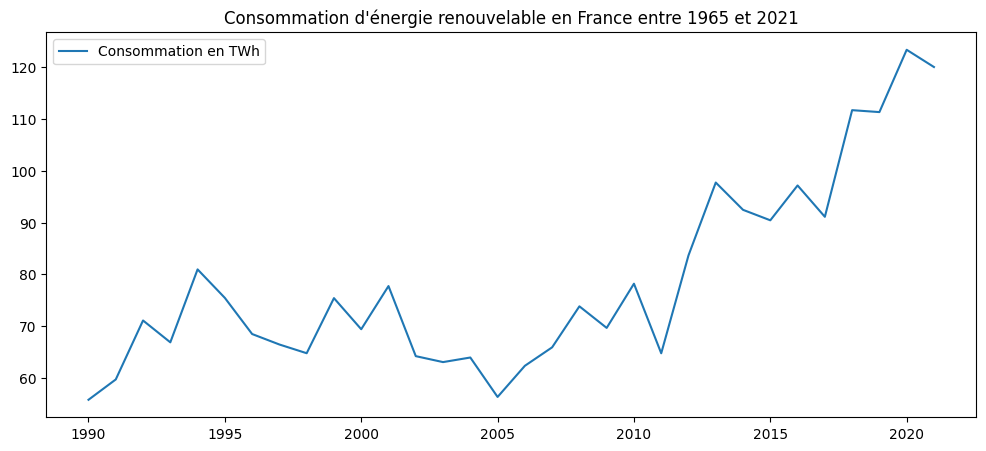

In [57]:
plt.figure(figsize=(12,5))
plt.title('Consommation d\'énergie renouvelable en France entre 1965 et 2021')
plt.plot(df['All_renew'], label='Consommation en TWh')
plt.legend(loc='best')
plt.show()

Modèle simple de tendance linéaire? 

Notre modèle est linéaire, et donc, suit la forme suivante: 

$$ All\_renew = \alpha + \beta *Solar  + \varepsilon $$


### Model Training 

In [58]:
#model = sm.OLS.from_formula('All_renew ~ Hydro + All_Fossil + Pop + Nuclear + GDP_per_cap + Life_exp + Nuclear + Solar + Urban + Rural + Other_renew ', data=df)
model = sm.OLS.from_formula('All_renew ~  Solar ', data=df)

results = model.fit()

### Model Evaluation

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              All_renew   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     190.0
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.63e-14
Time:                        14:39:33   Log-Likelihood:                -106.40
No. Observations:                  32   AIC:                             216.8
Df Residuals:                      30   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.7596      1.456     46.530      0.000      64.786      70.734
Solar          3.7220      0.270     13.782      0.000       3.170       4.274
==============================================================================
Omnibus:                        0.698   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.703
Skew:                           0.067   Prob(JB):                        0.704
Kurtosis:                       2.286   Cond. No.                         6.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Data Viz

In [63]:
df["Prediction_1"]= results.predict()
#results.predict()
#sum(df["Solar"].isna())

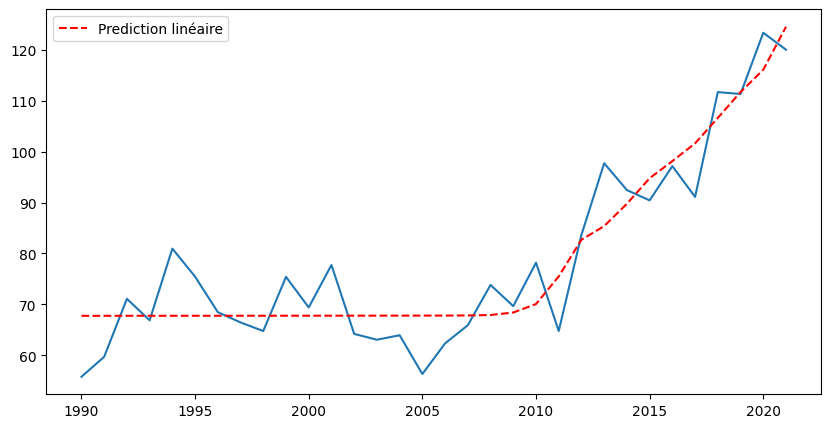

In [68]:

plt.figure(figsize=(10,5))
plt.plot(df['All_renew'])
plt.plot(df['Prediction_1'], 'r--',label='Prediction linéaire')
plt.legend(loc='best')
plt.show()